In [116]:
# **********************************************************************************************************************
 #                          Projet 3: Chaine de Markov et épidémiologie 
 #                 
 #      Réaliser par: 
 #                       Melissa LARBI 3971141
 #
 # ***********************************************************************************************************************


In [117]:
# ************************************************************************************************************
#                                Les importations 
# ***********************************************************************************************************

import random 
import matplotlib.pyplot as plt
import numpy as np # on aura besoin pour manipuler les matrice 
from scipy.linalg import eig
from tqdm import tqdm
from collections import Counter 
from time import sleep

In [118]:
# ************************************************************************************************
#                                      PARTIE 01
#
# ************************************************************************************************

In [119]:

# ************************************************************************************************
#                              1) Description du modèle 
#*************************************************************************************************

# les états de la chaine de markov
etats=["S","I","R"] # pour sain , infécté et quéri

# la matrice de transition avec les noms
transitionName=[["SS","SI","SR"],["IS","II","IR"],["RS","RI","RR"]]

# 1_ la matrice de transition avec les proba 
transionProba =np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])

# 2_ le distribution de probabilité initiale: 
p_0 = np.array([0.9,0.1])


# la taille des séquence
T = 50

# la taille d'une population 
population = 20000


In [120]:

#************************************************************************************************************
#                             2) Tirage aléatoire des états
#************************************************************************************************************


def etatInitial():
    """
    renvoie l'état initial d'un individu on se basant sur le tirage d'un nombre aléatoire
    entre 0 et 1 et le vecter des probat inital(p_0)
    """
    alea=random.random()
    if(alea<=p_0[1]):
        return "I"
    else: 
        return "S"
    
    
def Sequence_Un_Individue():
    """
    renvoie une séquence de taille T apres avoir choisie un état au hasard 
    puis la matrice des transions pour les état suivant
    """
    sequence=[] # la séquence générée sous forme d'une liste de chaine de saractère 
    etatActuel=etatInitial() # on cherche l'état initial de l'individue et on l'ajoute à la liste  
    sequence.append(etatActuel) 
    for t in range(0,T-1): # T-1 car on a compter même l'état initial dans les 50 
        if(etatActuel=="S"): # si l'état actuel est sain 
            etatSuivant = np.random.choice(transitionName[0],replace=True,p=transionProba[0]) # cette méthode renvoie une chaine parmis: ["SS","SI","SR"]
        elif(etatActuel=="I"):
            etatSuivant = np.random.choice(transitionName[1],replace=True,p=transionProba[1]) # cette méthode renvoie une chaine parmis: ["IS","II","IR"]
        else:
            etatSuivant = np.random.choice(transitionName[2],replace=True,p=transionProba[2]) # cette méthode renvoie une chaine parmis: ["RS","RI","RR"]
            
        etatActuel=etatSuivant[1]# soit S soit I ou sinon R
        sequence.append(etatSuivant[1]) # on ajoute le nouvel état à la séquence 
    return sequence



    

In [121]:
seq= Sequence_Un_Individue() # on génére une séquence aléatoir pour un individu 
#seq   #pour voir le résulat de la simulation pour un individu 

In [ ]:

#***********************************************************************************************************
#                            3) Modélisation d'une population 
# **********************************************************************************************************


# Question 1 

def Sequence_Popuation(): 
    """
    génère un tableau de séquence de taille T pour une population 
    """
    sequence=[]
    for i in range(0,population):
        sequence.append(Sequence_Un_Individue())
    return sequence 


def calcul_Nb_Individu_Chque_Instant(echantillon):
    """
    la fonction qui calcule le nobre d'individus sains, infécté et guéries à chaque 
    instant dans la population 
    echantillon: un tableau de toutes les séquences générés pour tous les individus de la population 
    """
    
    tableau_Nb_individus=[] # chaque indice est une valeur de temps et pour chaque indice le nombre des sains, inféctés et guéries
    for i in range(0,T): 
        colonne=[row[i] for row in echantillon] # pour chaque instant on extrair la colonne équivalente depuis echantillon 
        tableau_Nb_individus.append([colonne.count("S"),colonne.count("I"),colonne.count("R")]) # dans chaqe colonne on compte le nombre d'individus sains, inféctés et guéries
    return tableau_Nb_individus


def modélisation(tab):
    """
    une fonction qui nous renvoie un graphe de l'évolution des individus sains, inféctés et guérie dans 
    la population en fonction de temps
    taB: une matrice ou chaque colonne représente un temps et les ligne le nombre d'individus sains, inféctés et guéris à cet instznt
    """
    
    temps=[i for i in range(0,T)]
    ySein=[y[0] for y in tab] 
    yInfecte=[y[1] for y in tab]
    yGueri=[y[2] for y in tab]
    fig, ax = plt.subplots()
    ax.plot(temps,ySein,label="Sain.e.s")
    ax.plot(temps,yInfecte,label="Infecte.e.s")
    ax.plot(temps,yGueri,label="Gueri.e.s")
    ax.set_xlabel('Temps')
    ax.set_ylabel('Nombre de personnes dans chaque categorie')
    ax.set_title('Nombre d’individus dans chaque état en fonction du temps')
    ax.legend()
    
    

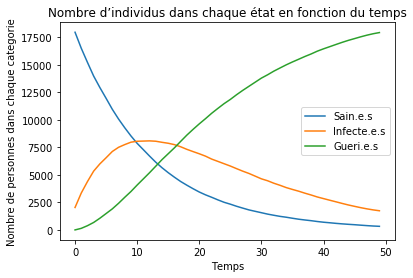

In [125]:
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)  # la fonction pour afficher le graphe de la simulation pour toute la population 

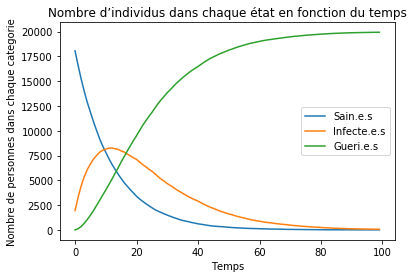

In [130]:
# Question 2:  Qaund T est grand !!!!   

# Quand t est suffisament grand on voit que: 
# À partir de T=100 
# le nombre d'individus guéris est stationnaire et égale à la taille de la population 
# le nombre de sains et celui des inféctés contre eux sont à 0. 
# Et ca le montre le graphe ci dessous: 

T = 100
echantillon_T_grand = Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab_T_grand = calcul_Nb_Individu_Chque_Instant(echantillon_T_grand)   # on classifie pour cahque 
modélisation(tab_T_grand)  # la fonction pour afficher le graphe de la simulation pour toute la population 

# On remet T à 50 pour la suite du projet 
T = 50 

In [131]:

# *********************************************************************************************************
#                                4) Pic de l’épidémie 
# *********************************************************************************************************

# le pic est la ou la dérivé de tangante du graphe qui représente les inféctés(l'orange) est nulle 
# mais comme on a pas son équation on peut essayer de l'approximer avec le gradientdescent avant 
# de pouvoir detecter les cordonnée du pic 

# Mais aussi le pic de l'épedemie est définie comme de maximum des infictation 
# c'est le concept qu'on applique ici pour trouver les coordonnées du pic 

def pic(tab):
    """
    renvoie le temps et le nombre d'individus au pic de l'épédemie 
    taB: une matrice ou chaque colonne représente un temps et les ligne le nombre d'individus sains, inféctés et guéris à cet instznt
    """
    infecte=[y[1] for y in tab] #on résupère la liste des inféctés 
    maxValue=max(infecte)
    indiceMax=infecte.index(maxValue)
    print("Le pic survient à temps= ",indiceMax)
    print("Au pic le nombre d'individus inféctés est:",maxValue)


In [132]:
pic(tab) # pour voie le résultat du pic de l'épidémie 

Le pic survient à temps=  12
Au pic le nombre d'individus inféctés est: 8078


In [95]:
# **********************************************************************************************************
#                               5) Longueur de l’infection
# **********************************************************************************************************

# Question 01: 

def estimeLongeurI(echantillon):
    """
    Renvoie l'estimation de la taille d'une séquence de I dans notre échontillion 
    Elle calcule donc c'est une estimation ponctuelle 
    echantillon: un tableau de toutes les séquences générés pour tous les individus de la population 

    """
    longuerI=[0 for i in range(0,T+1)] # un tableau qui contient pour chaque indice i le nombre de fois qu'on une séquence de I du longuer de l'indice 
                                    # on va prendre on considération les séquence qui contiennent pas des I et celle qui sont toute à I
    for i in range(0,len(echantillon)): # on itère sur tous les individus
        TailleSequenceI=echantillon[i].count("I")
        longuerI[TailleSequenceI]=longuerI[TailleSequenceI]+1 # on augmente le nombre des séquence avec cette taille 
    
    nbSéquence=np.sum(longuerI) # on peut pas considére directement que c'est la taille de la population car y aura peut etre les séquence qui ne contiennent pas des I !!
    s=np.sum([i*longuerI[i] for i in range(0,len(longuerI))]) # chaque taille(representer par la valeur de l'indice) est multiplier par son effectif(le nombre des séquence avec cette taille de sequence de I )
    return (s/nbSéquence) # la moyenne 


In [96]:
print("l'stimation moyenne de la longuer d'une séquence des I est:",estimeLongeurI(echantillon)) # estimer la moyenne de la longueur d'une sequece de I 

l'stimation moyenne de la longuer d'une séquence des I est: 12.89675


In [98]:
# ************************************************************************************************************
#                                    PARTIE 02
#
# ************************************************************************************************************

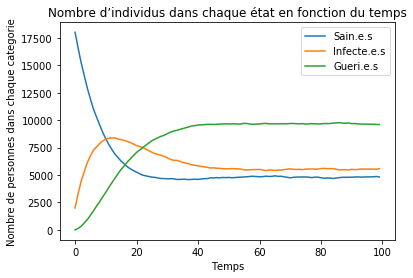

In [99]:
#*************************************************************************************************************
#                               1) Modèle ergodique 
# ************************************************************************************************************

T=100 # dans cette partie pour une meilleur visualisation je prends T un peu grand 

# Question 01: 

# La matrice de transition avec les proba 
# je modifie la variable globale transionProba
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
# Les etats son toujours les même donc on garde la variable globale : etats=["S","I","R"] 
# ce qui est aussi pareil pour la matrice: transitionName=[["SS","SI","SR"],["IS","II","IR"],["RS","RI","RR"]]
#  Si un individu guéri peut redevenir sain alors la chiane de markov est infinie et donc la population a toujours un risque de pendemie !!!





# Question 02 : refaire les estimation 

# on estime pour t=0 : 90% sains et 10% infecté: 
p_0 = np.array([0.9,0.1])
echantillon=Sequence_Popuation() 
tab= calcul_Nb_Individu_Chque_Instant(echantillon)
modélisation(tab)

# commentaire: 

# on voit dans le graphe et pour une population de 20000 :
# à t=0 le nombre de sains  est au max et le nom l'infécté est au min (à cause de notre distribution initiale)
# au lacement de la simulation on voit que le nombre de sains décroit progressivement et ca c'est parce que à chaque 
# pas dans la chaine de markov on a les individu sain qui passent à l'etat infécté avec une proba de 0,08 
# ce qui fait que le nombre d'infecté augmente de l'autre coté mais doucement car la proba de passer à l'etat infécté est 
# tres petite(0,08)
# le fait qu'on peut passé aussi à l'état gueri de l'état infécté avec une probe de 0,07 augmente à son tour le 
# nombre de gueris dans la population mais aussi d'une manière lente 
# Au pic le nombre des inféctés est maximum et au bout de quelque temps ce nombre commance à décroite car 
# les individus passent de plus en plus à l'état guéri
# pout T>=50 on peut dire que le nombre de sains, inféctés et guéris dans la population est stationnaire 


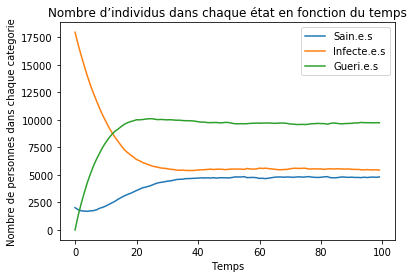

In [101]:
# on estime pour t=0 : 10% sains et 90% infecté: 
p_0 = np.array([0.1,0.9])
echantillon=Sequence_Popuation() 
tab= calcul_Nb_Individu_Chque_Instant(echantillon)
modélisation(tab)

# commentaire : 
#avec la distribution 0% sains et 90% infecté on voit que: le nombre d'inféctés est au max à t=0 
# et décroit au fur du temps en raison que les individus passent à l'état guéri
# le fait de pourvoir passé à l'atat sain quant on est guéri fait que le nombre de sains est en augmentation 
# dans la population 
# aprs que les individu infécté ne passent plus à l'état guéri( car cette proba est tres petite: 0,07) 
# on voit que le nombre des indivu guéri et sain est stationnaire en plus de celui des infécté 


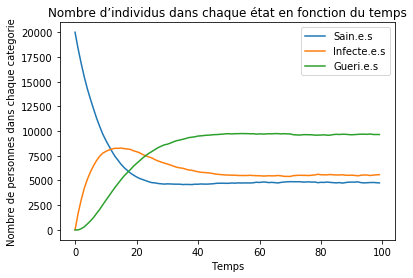

In [102]:
# on estime pour t=0 : 60% sains et 40% infecté: 
p_0 = np.array([0.6,0.])
echantillon=Sequence_Popuation() 
tab= calcul_Nb_Individu_Chque_Instant(echantillon)
modélisation(tab)

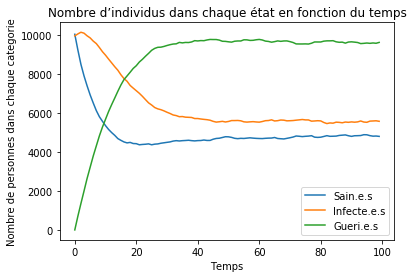

In [103]:
# on estime pour t=0 : 30% sains et 70% infecté: 

p_0 = np.array([0.5,0.5])
echantillon=Sequence_Popuation() 
tab= calcul_Nb_Individu_Chque_Instant(echantillon)
modélisation(tab)

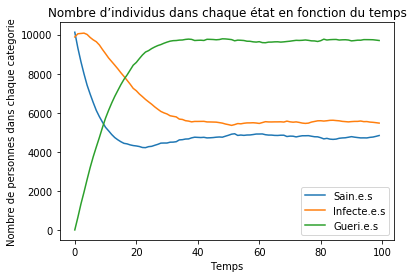

In [104]:
# on estime pour t=0 : 50% sains et 50% infecté: 

p_0 = np.array([0.5,0.5])
echantillon=Sequence_Popuation() 
tab= calcul_Nb_Individu_Chque_Instant(echantillon)
modélisation(tab)
# commentaire: 
# à t=0 le nombre de sains est égal à celui des infécté 
# au fur du temps on voit que le nombre des sains et des inféctés diminus et on paralèle 
# une augmentation très rapide du nombre des guéris et ca c'est parce que les 50% au bout de quelque itération 
 # passent à l'état guéris et de l'autre coté les sains passent à l'etat inféctés puis à l'état guéris 

In [105]:
# COMMENTAIRS GENERAL:

# les graphes ci dessus nous montrent que en général que:

#  __ Plus on a un nombre très grand les infécté à l'état initial plus l'etat stionniare arrive rapidement (ce que 
#     montre le graphe 2,4 et 5)
#  __ Le nombre de personne guéris est toujours en augmentation quel que soit la répartion des proba entre
#  sains et inféctés à t=0(ce que montre tous les graphes )
#  __ Le graphe des infécté dans tous les cas comporte une phase de décroissance mais pas toujours une phase 
#     de croissance pour T=100 et c'est en relation avec de la distribution des proba à t=0: plus on a un nombre 
#     grand des sains plus on a une phase de croissance pour les inféctés(ce que montre les graphe 1 et 2) 



In [107]:
# Question 03: 

# _ Tous les état de cette chaine sont des état transient contrairement à la partie 1 ou on a l'état R qui est stationair(car une fois dans R on reste que dans R)
# _ Cette chaine n'est pas périodique commme elle est la chaine de la partie 1(car une periode de 1 pour tous les étas)
# _ Cette chaine est pas irréductible car on peut allez de n'import quel état à n'import quel état contrairement à la chaine de la partie 1 ou en peut pas aller de R à S par exemple 


In [108]:
#Question 04: Le calcule de la distribution de probabilité stationnaire

def EtatStatonnair():
    """
    Calcul le vecteur de l'etat stationnaire 
    """
    # Nous devons transposer pour que les transitions de Markov correspondent 
    #à une multiplication à droite par un vecteur colonne.
    # np.linalg.eig trouve les bons vecteurs propres.
    evals,evecs = np.linalg.eig(transionProba.T)
    evec1 = evecs[:,np.isclose(evals, 1)]

    #np.isclose retournera un tableau, nous avons indexé avec un tableau
    # mais on a encore on a encore le 2ème axe.

    evec1 = evec1[:,0] # se débarasser du 2 eme axe 

    stationary = evec1 / evec1.sum()

   #eigs trouve des valeurs propres et des vecteurs propres complexes, on récupère donc la partie réelle.
    stationary = stationary.real
    return stationary



# La comparaison: Avec T assès grand 
# On voit que à partir d'un t le modèle est stationniar( on a le meme nombre de sains, d'infecté et de guéris)
# et pour tout T>t la distribution est toujours la même 

In [109]:
print("Le vecteur à l'état stationnair est:",EtatStatonnair())  # affiche de vecteur de l'état stionaire 

Le vecteur à l'état stationnair est: [0.24137931 0.27586207 0.48275862]


In [110]:

# ************************************************************************************************************
#                               PARTIE 03
#                   Modification du modèle : confinement 
# ************************************************************************************************************

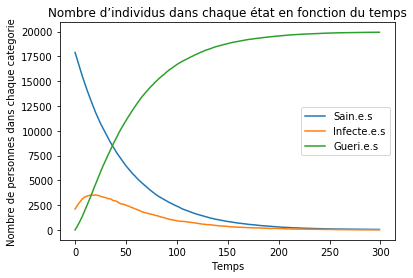

In [111]:
# Question 01: Si on baisse la probabilité qu'un individu redevient infécté !!

# Ici on est passé de 0,04 à 0,02
# la martrice de transtion est : 
transionProba =np.array([[0.98,0.02,0],[0,0.93,0.07],[0,0,1]])
p_0 = np.array([0.9,0.1])
T=300
echantillon=Sequence_Popuation() 
tab= calcul_Nb_Individu_Chque_Instant(echantillon)
modélisation(tab)
T=100

# Si on baisse la probabilité qu'un individu redevient infécté quand il est sain on remarque que: 
# l'alure du graphe est identque à celle du premier modèle mais on remarque que l'air sous le graphe des infécté 
# est beaucoup moin que celle dans le premier modèle et cela est du à la proba réduite car on a une plus petit 
# proba implique un nombre petit d'individus qui passent de sains à inféctés 

In [114]:
# Question 2 

A1 =np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]]) # ma matrice de transion de la première partie
A2=np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]]) # ma matrice de transion de la deuxième partie

        
def change_state(s, A):
    return np.random.choice(np.arange(3), p=A[s])


def step(population, A):
    return np.array(list(map(lambda s: change_state(s, A), population)))


def evolution(n_step, n_population, A1, A2):
    """
    La foncton de l'évolution de l'épdémie elle applique le modèle 1 puis le modèle 2 
    selon le nombre des inféctés dant la population 
    """
    population = np.zeros(n_population, dtype=np.int64)# on crie une matrice vide 
    all_populations = [population]
    A = A1   # au départ on applique la matrice de transition du modèle 1 
    pbar=tqdm(range(n_step), total=n_step) # pour l'affichage sous forme d'une barre 
    for i in pbar:
        percent = Counter(population)[1]/n_population # on conte le nombre des infecté 
        if percent >= 0.3 :
            msg = f"{np.round(percent*100,2)}% période de distanciation, !!"
            A = A2
        if percent < 0.15 :
            msg = f"{np.round(percent*100,2)}% confinement est levé !!"
            A = A1
        
        population = step(population, A)
        all_populations.append(population) 
        pbar.set_description(msg)
        sleep(.01)
    return np.stack(all_populations)
    
    
    
    
    

In [115]:
all_populations=evolution(n_step=T, n_population=population, A1=A1, A2=A2) # le résulat de l'évolution de l'épidémie 


30.03% période de distanciation, !!: 100%|██████████| 100/100 [01:14<00:00,  1.35it/s]


In [ ]:

# ************************************************************************************************************
#                               PARTIE 04 : Optionnel 
#                               
# ************************************************************************************************************

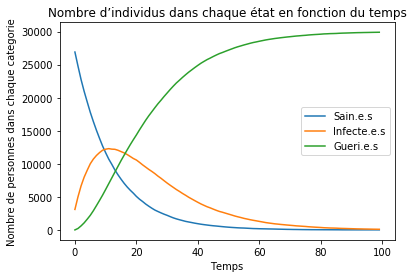

In [133]:
# La modification des modèles pour étudier différents cas de figure : 

################################## Le modèle 1: ##########################################################""

# 1) On modifie la taille de la population: 
 
            # pour 30000 individus
T=100
transionProba =np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
p_0 = np.array([0.9,0.1])

population=30000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)



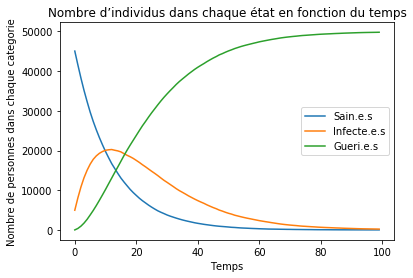

In [135]:
    # pour 50000 individus
    
population=50000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

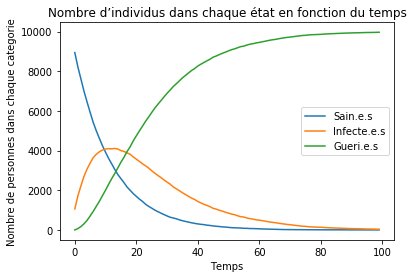

In [136]:
population=10000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

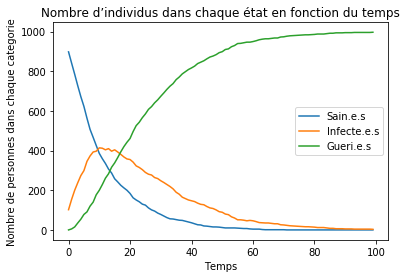

In [137]:
population=1000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

In [ ]:
# Conclusion :
# on remarque que la taille de la population n'affect pas les résulat du modèle 1: quelque soit la taille de 
# le population à la fin on a toute la population guéris, 0 sains et 0 inféctés
# on utilisera donc ce résultat dans les analyses qui ci dessous 

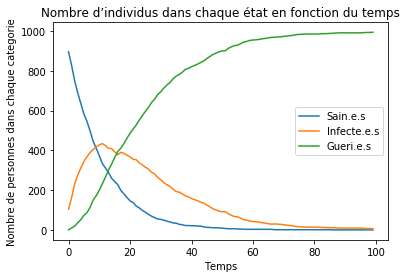

In [140]:
        # 2) On modifie la probabilité initiale:

    
        # pour 90$ sains et 10 nfectés 
        
population=1000
T=100
transionProba =np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
p_0 = np.array([0.9,0.1])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)


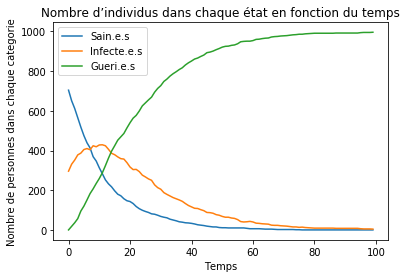

In [141]:
                 # pour 70$ sains et 30 nfectés 
        
population=1000
T=100
transionProba =np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
p_0 = np.array([0.7,0.3])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)


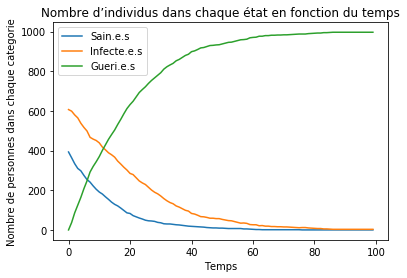

In [143]:
                # pour 40$ sains et 60 nfectés 
        
population=1000
T=100
transionProba =np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
p_0 = np.array([0.4,0.6])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)


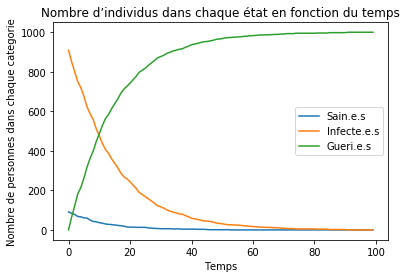

In [144]:
                # pour 10$ sains et 90 nfectés 
        
population=1000
T=100
transionProba =np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
p_0 = np.array([0.1,0.9])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

In [146]:
# conclusion 

# comme on peut le voir sur le schéma la distribution initiale affecte plus le graphe des infécté 
# plus on a des infécté que les sains à t=0 plus on a pas la phase de croissance des infécté.
# car moins de sains à t=0 implique moins de gens qui deviennet inféctés(car la proba S->I est trop faible) mais les inféctés
# qui sont déjà présent à t=0 deviennent guéris donc on a de plus en plus des infecté

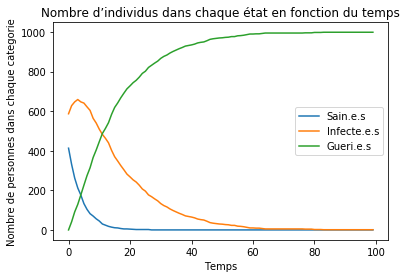

In [162]:
                  # 3) On modifie les probabilité de transition :
    
    # transionProba =np.array([[0.8,0.2,8,0],[0,0.8,0.2],[0,0,1]])
    
population=1000
T=100
p_0 = np.array([0.7,0.6])

transionProba = np.array([[0.8,0.2,0],[0,0.93,0.07],[0,0,1]])


echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    

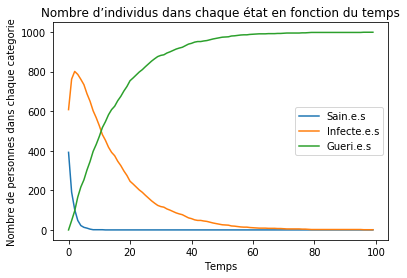

In [163]:
    # transionProba =np.array([[0.5,0.5,8,0],[0,0.93,0.07],[0,0,1]])
    

transionProba = np.array([[0.5,0.5,0],[0,0.93,0.07],[0,0,1]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

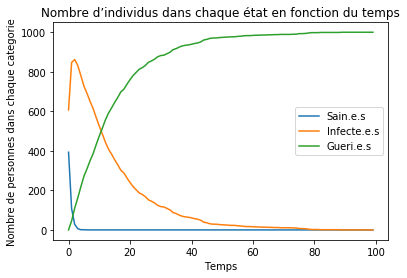

In [164]:
# transionProba =np.array([[0.3,0.7,8,0],[0,0.93,0.07],[0,0,1]])
    

transionProba = np.array([[0.3,0.7,0],[0,0.93,0.07],[0,0,1]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

In [165]:
# remarque :
# on remarque d'apres les graphes ci dessus que modifier la proba de boucler dans l'état S et celle de passer 
# à l'état I infecte de plus le graphe les sains : 
# plus la proba de passer à l'etat infécté est grande que la proba de bouclé sur l'etat S plus le graphe des sais
# décroit plus vite. 
# On voit dans le dernier graphe que passer de 400 sains à t=0 à 0 sains prend 1 temps on ayant la proba de boucler 
# sur S à 0,3 et celle de passer à I est 0,7 
# ca est du au fait que ya plus de chance de passer à I que de rester dans S 


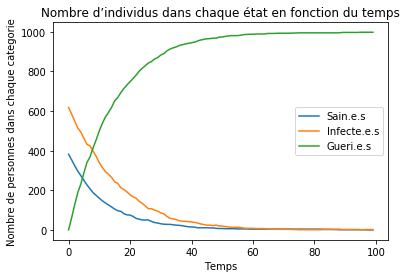

In [166]:
    # transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
   
transionProba = np.array([[0.92,0.08,0],[0,0.90,0.10],[0,0,1]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    
    

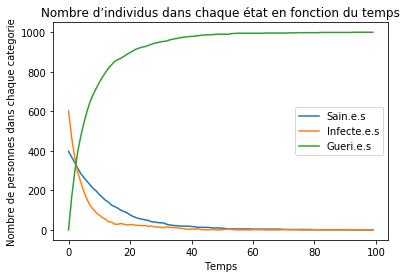

In [168]:
# transionProba = np.array([[0.92,0.08,0],[0,0.70,0.30],[0,0,1]])
   
transionProba = np.array([[0.92,0.08,0],[0,0.70,0.30],[0,0,1]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    

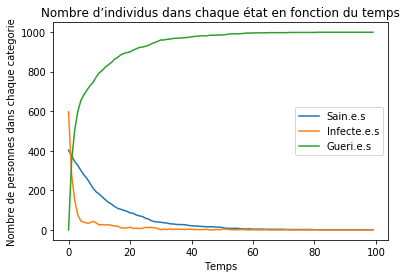

In [169]:
# transionProba = np.array([[0.92,0.08,0],[0,0.40,0.60],[0,0,1]])
   
transionProba = np.array([[0.92,0.08,0],[0,0.40,0.60],[0,0,1]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    

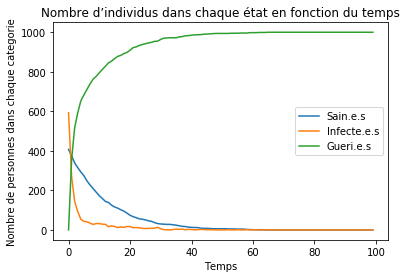

In [170]:
# transionProba = np.array([[0.92,0.08,0],[0,0.10,0.90],[0,0,1]])
   
transionProba = np.array([[0.92,0.08,0],[0,0.40,0.60],[0,0,1]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    

In [ ]:
# remarque : 
# on voit sur les graphes des inféctés 
# que plus la proba de passer à l'état R est grande sur la pboba de boucler sur I  plus la courbe des inféctés décoit
# plu vite et ca c'est du au fait que les individus ont une grande chance d'être guéris que de rester infectés 

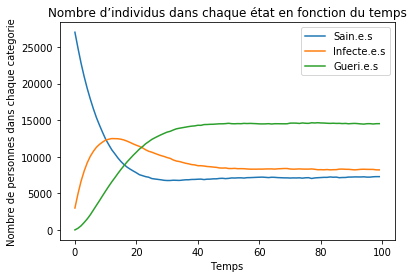

In [175]:

##########################  # Le modèle 1: ###############################################################


# 1) On modifie la taille de la population: 
 
            # pour 30000 individus
T=100
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
p_0 = np.array([0.9,0.1])

population=30000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)


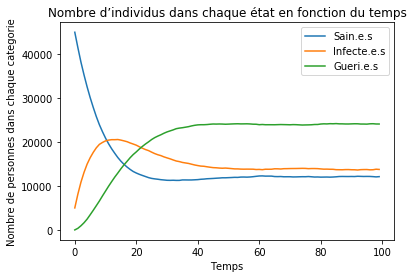

In [176]:
          # pour 50000 individus
T=100
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
p_0 = np.array([0.9,0.1])

population=50000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)


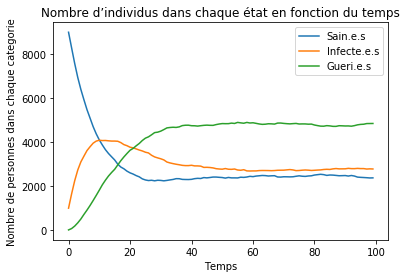

In [177]:
          # pour 10000 individus
T=100
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
p_0 = np.array([0.9,0.1])

population=10000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

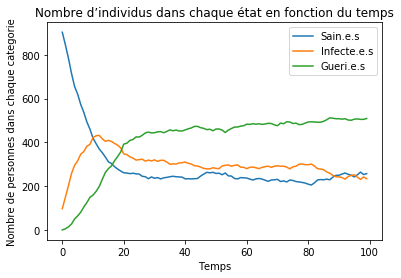

In [178]:
             # pour 1000 individus
T=100
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
p_0 = np.array([0.9,0.1])

population=1000
echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)  # on classifie pour cahque 
modélisation(tab)

In [ ]:
# remarque: 
# on voit dans les graphes que l'alure des courbes ne changent pas on changant la taille de la population 
# mais seulement du temps.
# on utilisera ce résulat dans le test suivant 

In [184]:
    # 2) On modifie la distribution de probabilité initiale: 
    
# remarque 
# on remarque que la distribution initiale a un impact sur l'allure de la courbe des infécté 
# le résultat on été commenté dans la partie 2 plus haut 
    
 

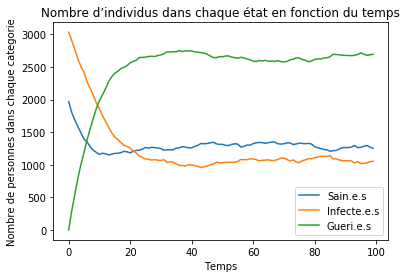

In [187]:
  # 2) On modifie les probabilité de transition : 
    
    
population=5000
T=100
p_0 = np.array([0.7,0.6])

transionProba = np.array([[0.92,0.08,0],[0,0.90,0.10],[0.04,0,0.96]])


echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    
 

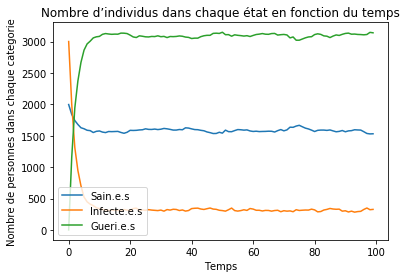

In [188]:
transionProba = np.array([[0.92,0.08,0],[0,0.60,0.40],[0.04,0,0.96]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    
 

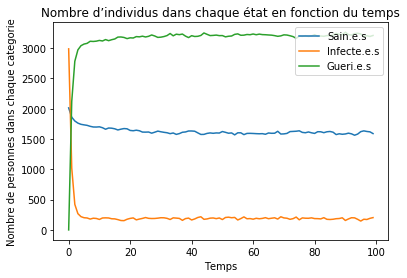

In [190]:
transionProba = np.array([[0.92,0.08,0],[0,0.30,0.70],[0.04,0,0.96]])


echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    

In [ ]:
# remarque: 
# on voit que mondifier la proba de boucler sur I et celle de passer à R inpacte clairement les courbes des inféctés
# et celles des guéris
# plus la proba de passer à R est plus rgande que celle de boucler sur I plus la courbe des inféctés décoit rapidement 
# et en parallèle celle des guéris croite rapidement 
# ca est du au faite que avoir la proba de passer à R plus grande augmante les  chances de guérison 
# et don au bout juste que quelque boucle sur I l'individu passe à l'état R 

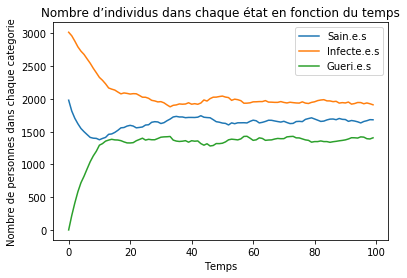

In [191]:
# ici on modifie les proba de transition entre R et S

transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.10,0,0.90]])

echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    
 

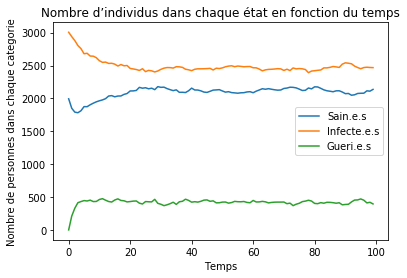

In [195]:
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.4,0,0.60]])


echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)
    

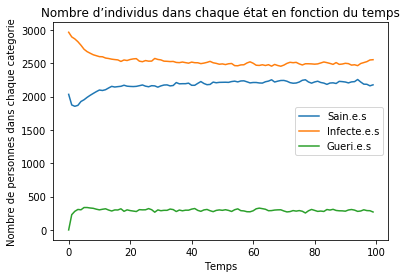

In [196]:
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.6,0,0.40]])


echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

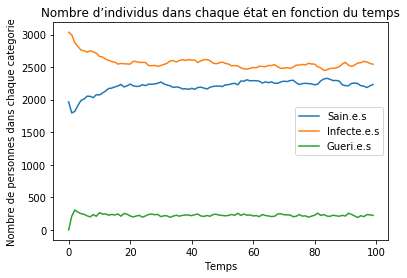

In [197]:
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.8,0,0.20]])


echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

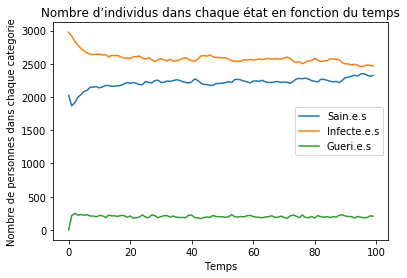

In [198]:
transionProba = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.9,0,0.10]])


echantillon=Sequence_Popuation()  #on gérére un échantillon de séquence pour toute la population  
tab= calcul_Nb_Individu_Chque_Instant(echantillon)   # on classifie pour cahque 
modélisation(tab)

In [ ]:
# remarque: 
# on voit que modifier les proba de transiton entre R et S affecte les 3 courbe 
# on remarque que plus la proba de passer à l'état S depuis R est grande plus l'allure de les courbe arrivent 
# à l'état stationnaire rapidement mais ca c'est dans le cas ou les proba de passer de S à I et de I à R sont petite


In [ ]:


                                  

#                   Remerciement pour mes supres profs 


#  Je tiens à vous écrire un grand « Merci » sincère pour votre soutien, votre enseignement et vos conseils
#  tout au long de ce semestre qui vient de s'écouler malgré ce semestre exceptionnel. 
#  Je veux que vous sachiez que vos élèves garderont un très bon souvenir de vous.
#  Jaurait aimé comme tout le monde effectuer ces projet dans d'autres circonstances. 
#  Malgré tout, j'espère que je vous ai pas déçu.


